# Titanic Data : Exploratory Data Analysis & Survivor's Prediction

## EDA Analysis

+ Check the Data  + Correlation Maps + Check NaN values
+ Calculate the number of surviving/non-surviving passengers.
+ Calculate the proportion of surviving 1st class passengers with regards to the total number of 1st class passengers.
+ Create a bar plot with separate bars for male/female passengers and 1st/2nd/3rd class passengers.
+ Create bar plot for survived and drowned passengers for different classes.
+ Classify Man/Woman/Child surviving and drowned.
+ Create a histogram showing the age distribution of passengers. Compare surviving/non-surviving passengers.
+ Calculate the average age for survived and drowned passengers separately.
+ Create a table counting the number of surviving/drowned passengers separately for 1st/2nd/3rd class and male/female.


In [157]:
# Import dependencies
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("ggplot")
import pickle

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, KBinsDiscretizer, MinMaxScaler

from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, plot_confusion_matrix

import warnings
warnings.filterwarnings('ignore')

In [158]:
# Read the Data

df = pd.read_csv('/Data/train.csv')
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


#### Check the Data
+ Correlation Maps
+ Check NaN values

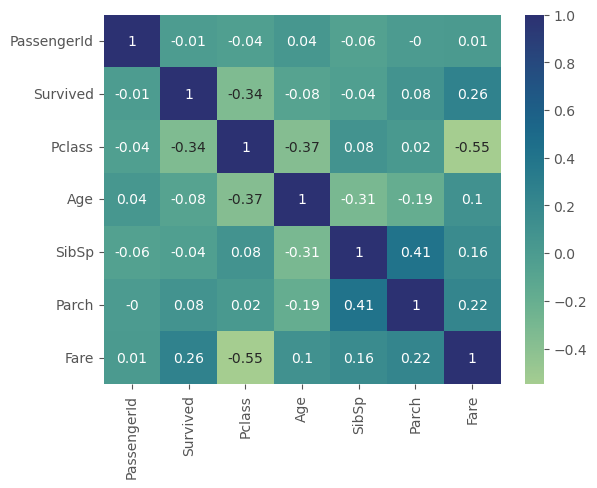

In [159]:
# Plot a correlation map
sns.heatmap(round(df.corr(),2), annot=True, fmt="g", cmap='crest' )
plt.show()

In [160]:
# Check NaN Values from different columns
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### Question: Calculate the number of surviving/non-surviving passengers.

In [161]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Survived :  342 ,    Drowned :  549
Percentage survived :  38.38 %


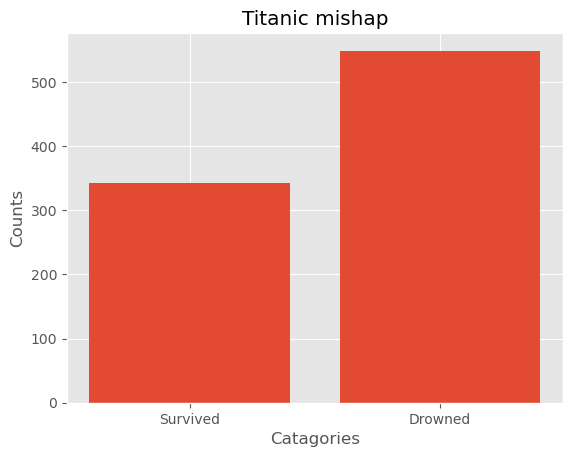

In [162]:
# %% 
# Passenger Survived
psurvived = df['Survived'].sum()
pdrowned = len(df.index) - psurvived

print('Survived : ',psurvived, ',    Drowned : ', pdrowned)
print('Percentage survived : ', round(psurvived/len(df.index) * 100,2), '%')

plt.figure()
plt.bar(['Survived', 'Drowned'], [psurvived, pdrowned] )
plt.xlabel('Catagories'); plt.ylabel('Counts'); 
plt.title('Titanic mishap')
plt.show()

#### Question: Calculate the proportion of surviving 1st class passengers with regards to the total number of 1st class passengers.

In [163]:
df_Survived1 = ((df['Survived'] == 1)  & (df['Pclass'] == 1)).value_counts()
df_Total1 = ((df['Pclass'] == 1)).value_counts()
                
print('Total 1st Class survived      : ',df_Survived1[1])
print('Total 1st Class Passenger     : ',df_Total1[1])
print('1st Class Survived percentage : ',round(df_Survived1[1]/df_Total1[1] * 100))

Total 1st Class survived      :  136
Total 1st Class Passenger     :  216
1st Class Survived percentage :  63


#### Question: Create a bar plot with separate bars for male/female passengers and 1st/2nd/3rd class passengers.

In [164]:
# Passengers in different classes
print('Total number of passengers in different classes')
df_PClass1M = ((df['Sex'] == 'male') & (df['Pclass'] == 1)).value_counts()
df_PClass1F = ((df['Sex'] == 'female') & (df['Pclass'] == 1)).value_counts()
print('1stClass Male    :',df_PClass1M[1])
print('1stClass Female  :',df_PClass1F[1])
df_PClass2M = ((df['Sex'] == 'male') & (df['Pclass'] == 2)).value_counts()
df_PClass2F = ((df['Sex'] == 'female') & (df['Pclass'] == 2)).value_counts()
print('2ndClass Male    :',df_PClass2M[1])
print('2ndClass Female  :',df_PClass2F[1])
df_PClass3M = ((df['Sex'] == 'male') & (df['Pclass'] == 3)).value_counts()
df_PClass3F = ((df['Sex'] == 'female') & (df['Pclass'] == 3)).value_counts()
print('3rdClass Male    :',df_PClass3M[1])
print('3rdClass Female  :',df_PClass3F[1])

Total number of passengers in different classes
1stClass Male    : 122
1stClass Female  : 94
2ndClass Male    : 108
2ndClass Female  : 76
3rdClass Male    : 347
3rdClass Female  : 144


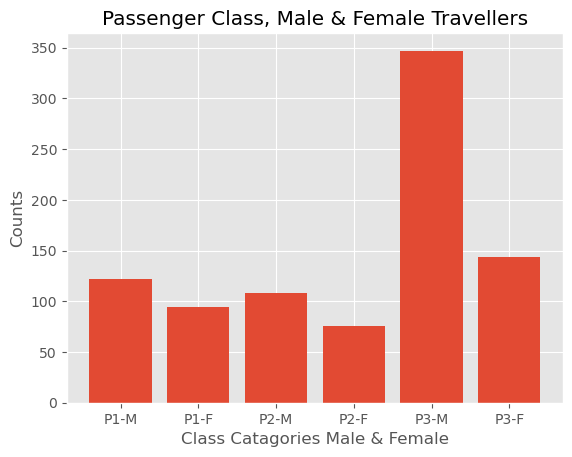

In [165]:
# Figure for different classes catagorized by Male & Female 
plt.figure()
plt.bar(['P1-M', 'P1-F', 'P2-M', 'P2-F', 'P3-M', 'P3-F'], [df_PClass1M[1], df_PClass1F[1], df_PClass2M[1], df_PClass2F[1], df_PClass3M[1], df_PClass3F[1]] )
plt.xlabel('Class Catagories Male & Female'); plt.ylabel('Counts'); 
plt.title('Passenger Class, Male & Female Travellers')
plt.show()

#### Question: Create Bar plot for survived and drowned passengers for different classes.

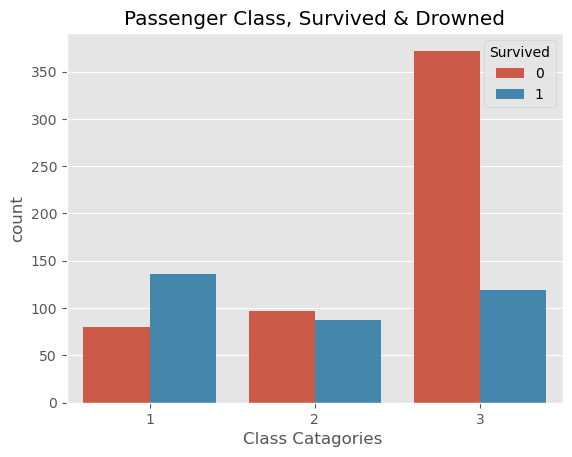

In [166]:
plt.figure()
sns.countplot(data= df, x = 'Pclass', hue='Survived')
plt.xlabel('Class Catagories ')
plt.title('Passenger Class, Survived & Drowned')
plt.show()

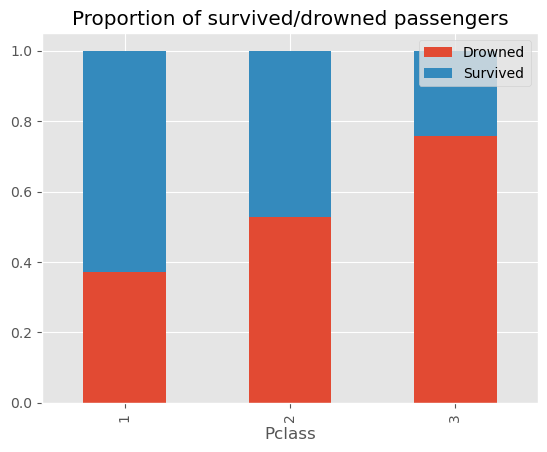

In [167]:
# Another way of seeing it as percentage (stacked)
df_PClass = df.groupby('Pclass')['Survived'].value_counts(normalize = True).unstack()       # Groupby 'Pclass' and count the survived one
df_PClass.plot(kind='bar', stacked='True')
plt.title('Proportion of survived/drowned passengers')
plt.legend(( 'Drowned', 'Survived'))
plt.show()

#### Question: Classify Man/Woman/Child surviving and drowned

Passengers with Age unknown (NaN) :  177


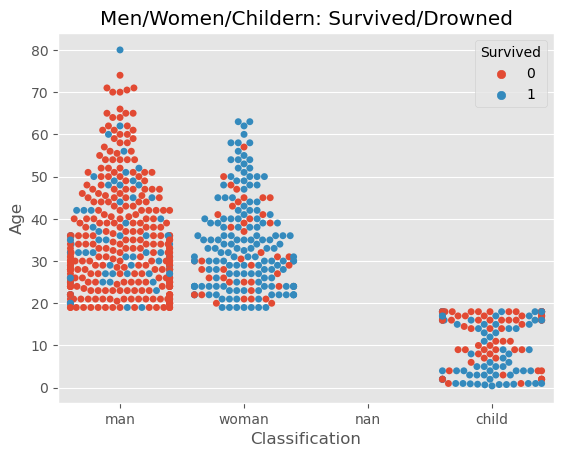

In [168]:
# Create a New column to classify between man women and childern & plot
df.loc[df['Age'] <= 18, 'Classification'] = 'child'
df.loc[(df['Age'] > 18) & (df['Sex'] == 'female') , 'Classification'] = 'woman'
df.loc[(df['Age'] > 18) & (df['Sex'] == 'male') , 'Classification'] = 'man'
sns.swarmplot(data=df, x='Classification', y= 'Age', hue='Survived').set_title('Men/Women/Childern: Survived/Drowned')
print('Passengers with Age unknown (NaN) : ' , df['Age'].isnull().sum())

#### Create a histogram showing the age distribution of passengers.

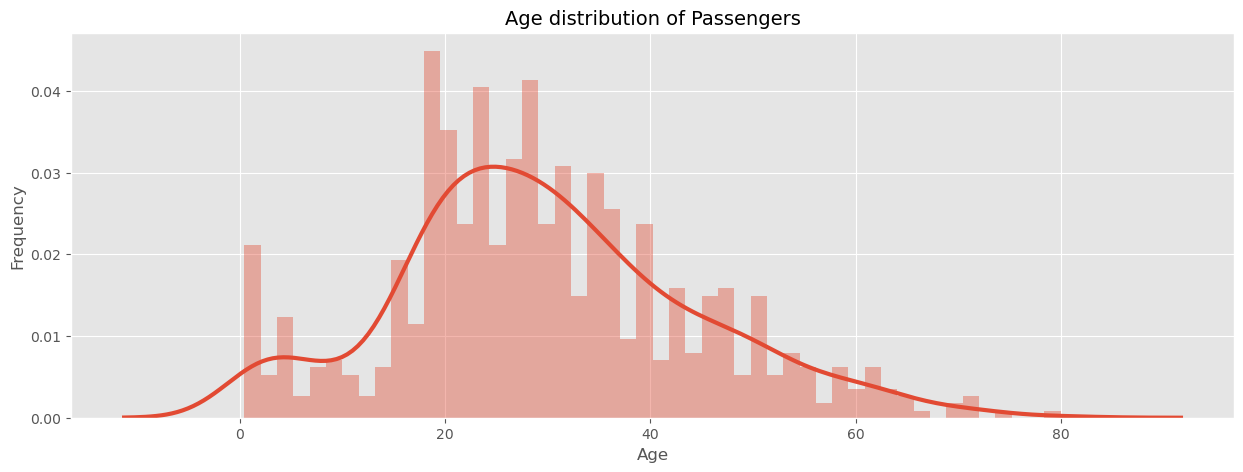

In [169]:
# Age distribution of the passengers.

plt.figure(figsize=(15, 5))         # set plot size

sns.distplot(df[(df["Age"] > 0)].Age, kde_kws={"lw": 3}, bins = 50)     # univariate distribution of Age 

plt.title('Age distribution of Passengers',fontsize= 14)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

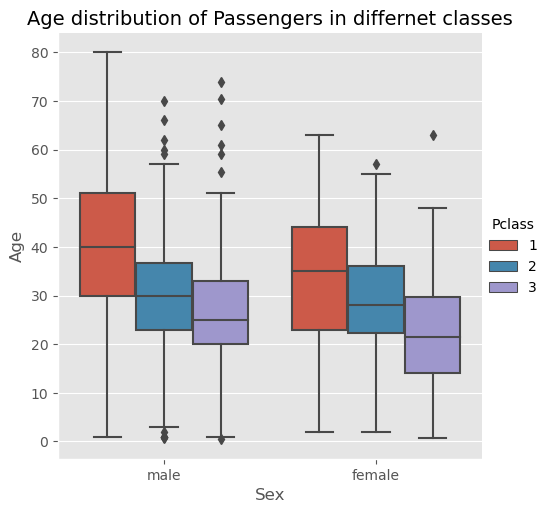

In [170]:
# For different classes 
sns.catplot(x = "Sex", y = "Age", hue = "Pclass",data = df, kind = "box")
plt.title('Age distribution of Passengers in differnet classes',fontsize= 14)
plt.show()

#### Question : Calculate the average age for survived and drowned passengers separately.

In [171]:
print('Mean age including NaN values : ', df[['Age']].mean())   # Find mean age

df_Survived = df['Survived'] == 1
meanAge_Survived = df.loc[df_Survived, 'Age'].mean()
print('Mean age including NaN values- Survived :', meanAge_Survived)

df_Drowned = df['Survived'] == 0
meanAge_Drowned = df.loc[df_Drowned, 'Age'].mean()
print('Mean age including NaN values- Drowned  :', meanAge_Drowned)

print('Mean of Drowned and Survived Passenger including NaN values: ',(meanAge_Drowned + meanAge_Survived)/2)

Mean age including NaN values :  Age    29.699118
dtype: float64
Mean age including NaN values- Survived : 28.343689655172415
Mean age including NaN values- Drowned  : 30.62617924528302
Mean of Drowned and Survived Passenger including NaN values:  29.48493445022772


In [172]:
# Replace missing age values by the mean age.
df[['Age']].mean()   # Find mean age
print('mean Age of all Passengers :', df[['Age']].mean())

#df[df['Age'].isnull().any(axis=1)]
check_nan = df['Age'].isnull().value_counts()      # Find NaN values
print('No of NaN values:',check_nan)

mean Age of all Passengers : Age    29.699118
dtype: float64
No of NaN values: False    714
True     177
Name: Age, dtype: int64


In [173]:
df_age = df['Age'].fillna(df['Age'].mean()) # Fill NaN with mean values
print("Check the number of NaN's after NaN fills", df_age.isnull().value_counts())
print('New mean Age after NaN fills (mean values ): ',df_age.mean())

Check the number of NaN's after NaN fills False    891
Name: Age, dtype: int64
New mean Age after NaN fills (mean values ):  29.699117647058763


#### Create a table counting the number of surviving/drowned passengers separately for 1st/2nd/3rd class and male/female.

In [174]:
df_table = pd.DataFrame(df.groupby(['Pclass', 'Sex', 'Survived'])['Age'].count())
df_table

Age
Pclass Sex    Survived     
1      female 0           3
              1          82
       male   0          61
              1          40
2      female 0           6
              1          68
       male   0          84
              1          15
3      female 0          55
              1          47
       male   0         215
              1          38

### Build model for the Titanic data.

#### Logistic Regression model

In [175]:
# Reload the data
df = pd.read_csv('/Data/train.csv')
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [176]:
# Selecting the Features (input variables)
X = df[['PassengerId','Pclass', 'Sex', 'Age', 'Embarked' ]] 
y = df['Survived']

# Check X & y
X.head() # X.describe() # X.corr()

,PassengerId,Pclass,Sex,Age,Embarked
0,1,3,male,22.0,S
1,2,1,female,38.0,C
2,3,3,female,26.0,S
3,4,1,female,35.0,S
4,5,3,male,35.0,S


<AxesSubplot: >

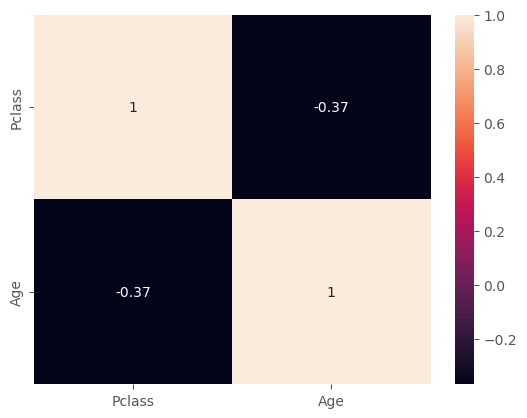

In [177]:
sns.heatmap(X[["Pclass","Sex","Age","Embarked"]].corr(), annot = True)

In [178]:
## Perform a train test split
Xtrain, Xval, ytrain, yval = train_test_split(X, y, test_size=.2, random_state=42, stratify=y)

# Combine back Xtrain, ytrain
df_train = pd.concat([Xtrain,ytrain], axis=1)

In [179]:
df_train.isna().sum()              # Check the NaN 

PassengerId      0
Pclass           0
Sex              0
Age            137
Embarked         2
Survived         0
dtype: int64

In [180]:
Xtrain.corr()       # Checking the correlation between the features

,PassengerId,Pclass,Age
PassengerId,1.000000,-0.031452,0.036080
Pclass,-0.031452,1.000000,-0.351089
Age,0.036080,-0.351089,1.000000


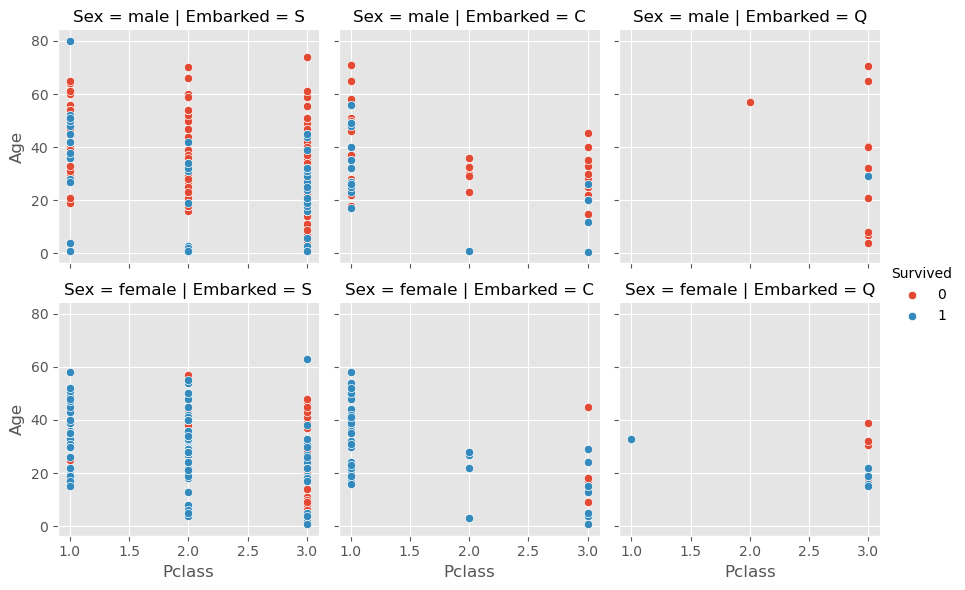

In [181]:
g = sns.FacetGrid(data=df_train, hue='Survived', col='Embarked', row='Sex')
g.map(sns.scatterplot, 'Pclass', 'Age')
g.add_legend()
plt.show()

In [182]:
# Featuring Engeneering
# Pclass (3 classes)    : one-hot-encode
# Sex (binary)          : one-hot-encode
# Age ( + NaN)          : imputation (filling the nan) and then one-hot-encode
# Embarked (3 places + NaN )    : imputation (filling the nan) and then scaling or binning
# Survived (binary)     : Prediction variable

In [183]:
# Make pipeline
impute_and_then_ohe = make_pipeline(SimpleImputer(strategy="most_frequent"), OneHotEncoder(sparse=False))
impute_and_then_ohe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                ('onehotencoder', OneHotEncoder(sparse=False))])

In [184]:
# ColumnTransformer : applying different transformers/ preprocessors to different columns of the DataFrame

fe = ColumnTransformer([
    ("impute_Age", SimpleImputer(strategy="most_frequent"), ["Age"] ),
    ("ohe_Sex_PCl", OneHotEncoder(handle_unknown='ignore'),["Sex","Pclass" ]),
    ("impute_and_oheEmb", impute_and_then_ohe, ["Embarked"] )], remainder = 'passthrough')
fe

ColumnTransformer(remainder='passthrough',
                  transformers=[('impute_Age',
                                 SimpleImputer(strategy='most_frequent'),
                                 ['Age']),
                                ('ohe_Sex_PCl',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 ['Sex', 'Pclass']),
                                ('impute_and_oheEmb',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(sparse=False))]),
                                 ['Embarked'])])

In [185]:
# fit the column transformer on the training data
fe.fit(Xtrain)

# transform the training data
Xtrain_tran = fe.transform(Xtrain)

In [186]:
Xval.isna().sum()

PassengerId     0
Pclass          0
Sex             0
Age            40
Embarked        0
dtype: int64

In [187]:
# transform the test/validation data
Xval_tran = fe.transform(Xval)
pd.DataFrame(Xval_tran).isna().sum()

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
dtype: int64

In [188]:
# Train and Fit the model on the (transformed) training data

# instantiate the model 
m_lgr = LogisticRegression() # build a logistic regression model the model

# fit the model (train the model)
m_lgr.fit(Xtrain_tran,ytrain) #

LogisticRegression()

In [189]:
print('Logistic Regression accuracy score ( transformed training data) : ',m_lgr.score(Xtrain_tran,ytrain))

# Evaluate the model on the (transformed) test data i.e calculate predictions with the transformed test data
# calculate an accuracy score
print('Logistic Regression accuracy score ( transformed test data)     : ',m_lgr.score(Xval_tran,yval))

Logistic Regression accuracy score ( transformed training data) :  0.800561797752809
Logistic Regression accuracy score ( transformed test data)     :  0.776536312849162


In [190]:
# Applying Feature Engineering and Modeling in one go
fe              # Previously defined FE
# Building the model together with feature engeenering
one_go_mlr= make_pipeline(fe, LogisticRegression(max_iter=10000))
# train the model
one_go_mlr.fit(Xtrain,ytrain)
# Check the score
one_go_mlr.score(Xval,yval)


0.776536312849162

In [191]:
predictions = m_lgr.predict(Xval_tran)
predictions

array([0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0])

#### Create Pickle files


In [192]:
# Files that can be directly used with just reading them
with open('model_LinearRegression_1.pkl', 'wb') as file: 
    pickle.dump(m_lgr, file)

with open('featureEngineering_1.pkl', 'wb') as file:
    pickle.dump(fe, file)

#### Prediction for test data

In [193]:
# Load the unseen test data
df_test = pd.read_csv('/Data/test.csv')
df_test.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


In [194]:
test_tran = fe.transform(df_test)               # Feature transform
test_tran = pd.DataFrame(data=test_tran)        # convert in to dataframe
test_tran.head()

,0,1,2,3,4,5,6,7,8,9
0,34.5,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,892.0
1,47.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,893.0
2,62.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,894.0
3,27.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,895.0
4,22.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,896.0


In [195]:
final_pred = pd.DataFrame(m_lgr.predict(test_tran))     # predict the test/unseen data
final_pred

,0
0,0
1,0
2,0
3,0
4,1
...,...
413,0
414,1
415,0
416,0


### Build a Baseline Model

#### DummyClassifier : A classifier model that make predictions without trying to find patterns in the data

In [196]:
## Perform a train test split
Xtrain, Xval, ytrain, yval = train_test_split(X, y, test_size=.2, random_state=42, stratify=y)

In [197]:
# Create a function for evaluating metrics
def print_binary_evaluation(Xtrain, Xval, ytrain, yval, strategy):
    dummy_cls = DummyClassifier(strategy=strategy)
    dummy_cls.fit(Xtrain,ytrain)
    y_pred = dummy_cls.predict(Xval)

    result_dict = {'accuracy'  : accuracy_score(yval,y_pred),       # TP + TN / (TP+FP+TN+FN)
                   'recall'    : recall_score(yval,y_pred),         # TP/(TP+FN)
                   'precision' : precision_score(yval,y_pred),      # TP/(TP+FP)
                   'f1_score'  : f1_score(yval,y_pred)}             # 2* (Recall*Precision)/(Recall+Precision)/
    
    return result_dict

In [198]:
# Most Frequent (Mode) : Predict the most frequent label
print_binary_evaluation(Xtrain, Xval, ytrain, yval, 'most_frequent')

{'accuracy': 0.6145251396648045,
 'recall': 0.0,
 'precision': 0.0,
 'f1_score': 0.0}

In [199]:
# Uniform : Predicts the random uniform distribution
# i.e all the targets have a similar probability of being a prediction output
print_binary_evaluation(Xtrain, Xval, ytrain, yval, 'uniform')

{'accuracy': 0.547486033519553,
 'recall': 0.5507246376811594,
 'precision': 0.4318181818181818,
 'f1_score': 0.48407643312101906}

In [200]:
# Stratified : its a strategy to create a baseline model that follows target distribution
# Its good for imbalanced data
print_binary_evaluation(Xtrain, Xval, ytrain, yval, 'stratified')

{'accuracy': 0.4972067039106145,
 'recall': 0.3333333333333333,
 'precision': 0.34328358208955223,
 'f1_score': 0.338235294117647}

In [201]:
dummy_cls = DummyClassifier(strategy="stratified")
Xtrain.head(2)

,PassengerId,Pclass,Sex,Age,Embarked
692,693,3,male,NaN,S
481,482,2,male,NaN,S


In [202]:
dummy_cls.fit(Xtrain,ytrain)

DummyClassifier(strategy='stratified')

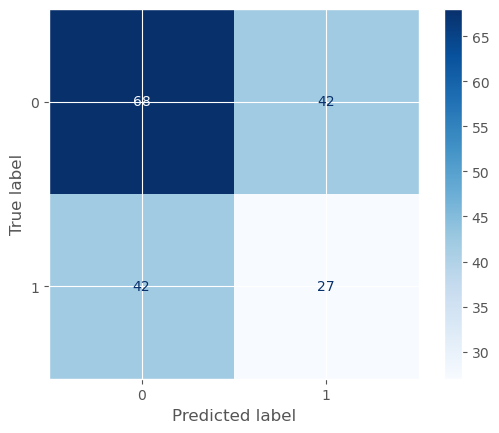

In [203]:
plot_confusion_matrix(estimator=dummy_cls, X=Xval, y_true = yval, cmap='Blues')

In [204]:
# score on training data
print('score on - training data : ',round(dummy_cls.score(Xtrain, ytrain),2))
# score on test data
print('score on - test data     : ',round(dummy_cls.score(Xval, yval),2))

score on - training data :  0.52
score on - test data     :  0.51


In [205]:
print('Training   Prediction :\n',ytrain.value_counts(normalize=True))
print('Validation Prediction :\n',yval.value_counts(normalize=True))

Training   Prediction :
 0    0.616573
1    0.383427
Name: Survived, dtype: float64
Validation Prediction :
 0    0.614525
1    0.385475
Name: Survived, dtype: float64


In [206]:
dummy_cls.predict(Xval)

array([0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 1])

#### Random Forest

+ A decision tree combines some decisions, whereas a random forest combines several decision trees.

In [207]:
rf = RandomForestClassifier(n_estimators=10, max_depth=5)
rf.fit(Xtrain_tran,ytrain)                  # Fit the training data

RandomForestClassifier(max_depth=5, n_estimators=10)

In [208]:
print('RandomForest Classifier score - on transformed training data:',rf.score(Xtrain_tran,ytrain))

RandomForest Classifier score - on transformed training data: 0.851123595505618


In [209]:
print('feature importances : ',rf.feature_importances_)

feature importances :  [0.12529486 0.26060078 0.2723736  0.0827294  0.02044426 0.10376148
 0.01976024 0.01197528 0.0185162  0.08454388]
